# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df_sinasc = pd.read_csv('sinasc_RO_2019.csv', sep=',')

In [5]:
df_sinasc.shape

(27028, 69)

In [3]:
df_sinasc.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [25]:
df_sinasc[['APGAR1', 'APGAR5', 'SEXO', 'GESTACAO', 'ESTCIVMAE', 'CONSULTAS']]

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,5.0,4
1,8.0,9.0,Feminino,37 a 41 semanas,2.0,4
2,8.0,10.0,Feminino,37 a 41 semanas,9.0,4
3,9.0,10.0,Feminino,37 a 41 semanas,5.0,3
4,8.0,10.0,Feminino,37 a 41 semanas,2.0,4
...,...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,2.0,4
27024,8.0,9.0,Masculino,37 a 41 semanas,1.0,4
27025,9.0,10.0,Masculino,37 a 41 semanas,2.0,4
27026,8.0,9.0,Masculino,32 a 36 semanas,2.0,4


In [17]:
df_sinasc['APGAR1'].value_counts().sort_index()

0.0        30
1.0        28
2.0        72
3.0       101
4.0       116
5.0       260
6.0       550
7.0      1973
8.0     14642
9.0      8928
10.0      232
Name: APGAR1, dtype: int64

<Axes: >

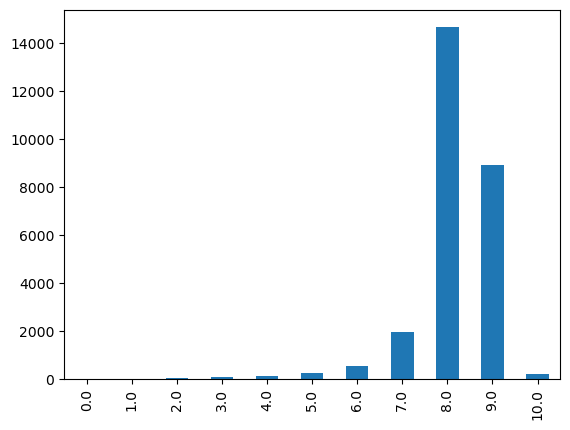

In [18]:
df_sinasc['APGAR1'].value_counts().sort_index().plot.bar()

<Axes: >

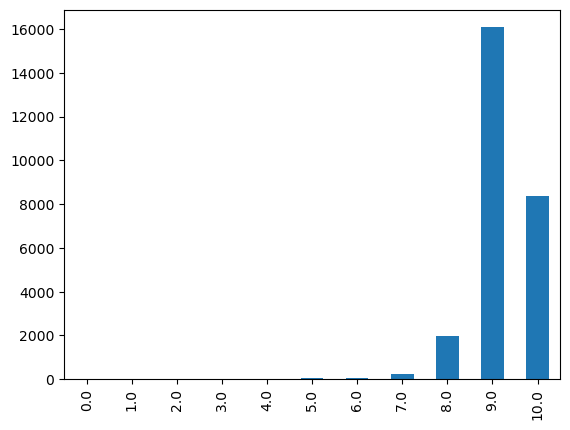

In [21]:
df_sinasc['APGAR5'].value_counts().sort_index().plot.bar()

<Axes: >

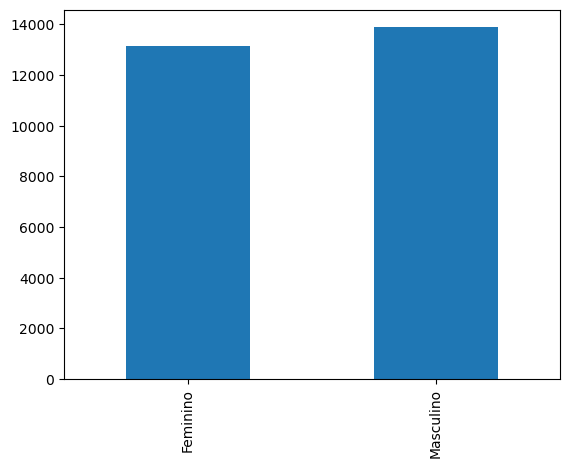

In [22]:
df_sinasc['SEXO'].value_counts().sort_index().plot.bar()

<Axes: >

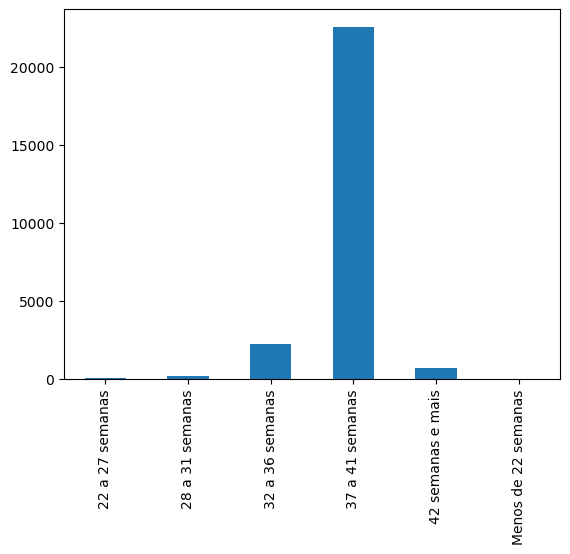

In [23]:
df_sinasc['GESTACAO'].value_counts().sort_index().plot.bar()

<Axes: >

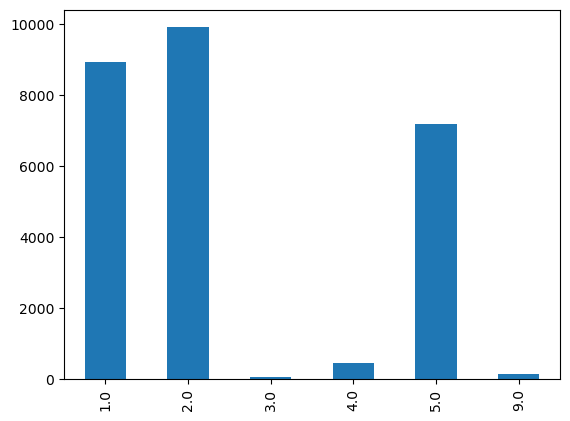

In [24]:
df_sinasc['ESTCIVMAE'].value_counts().sort_index().plot.bar()

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [47]:
df_sinasc['CONSULTAS'].value_counts().sort_index()

1      986
2     1379
3     5988
4    18624
9       51
Name: CONSULTAS, dtype: int64

In [44]:
df_sinasc['APGAR5'].value_counts().sort_index()

0.0        17
1.0        24
2.0        18
3.0        15
4.0        23
5.0        45
6.0        79
7.0       241
8.0      1994
9.0     16076
10.0     8393
Name: APGAR5, dtype: int64

<Axes: xlabel='CONSULTAS'>

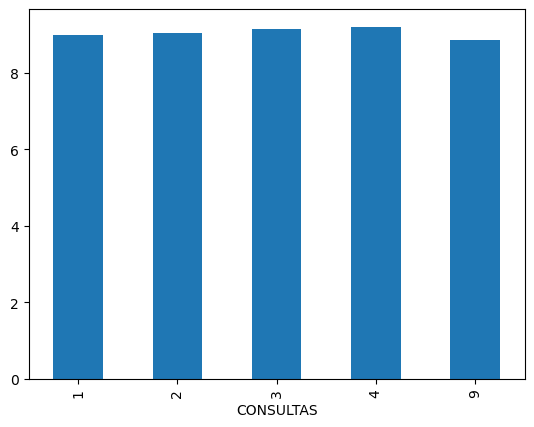

In [49]:
media_apgar5_por_consultas = df_sinasc.pivot(columns='CONSULTAS', values='APGAR5').mean()
media_apgar5_por_consultas.plot.bar()

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

<Axes: xlabel='CONSULTAS', ylabel='count'>

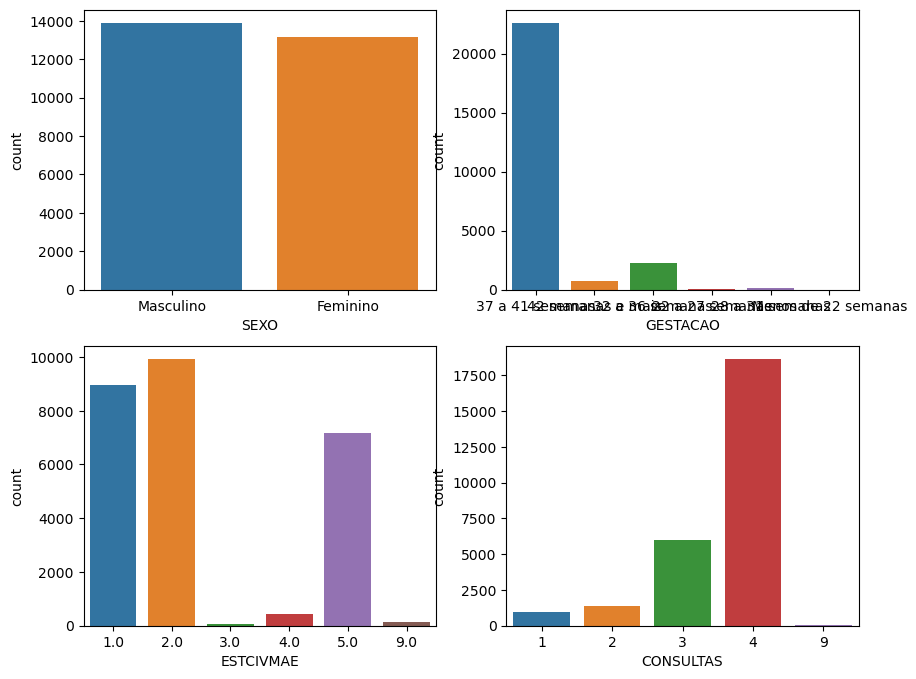

In [61]:
plt.rc('figure', figsize=(10,8))
fig, axes = plt.subplots(2,2)

sns.countplot(ax = axes[0, 0], x='SEXO', data=df_sinasc)
sns.countplot(ax = axes[0, 1], x='GESTACAO', data=df_sinasc)
sns.countplot(ax = axes[1, 0], x='ESTCIVMAE', data=df_sinasc)
sns.countplot(ax = axes[1, 1], x='CONSULTAS', data=df_sinasc)